In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler as SS
from scipy import stats

import warnings
warnings.simplefilter(action='ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Simulation 1

You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 1/2 chance of telling you the truth and, the other two have 1/4 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining in Boston?

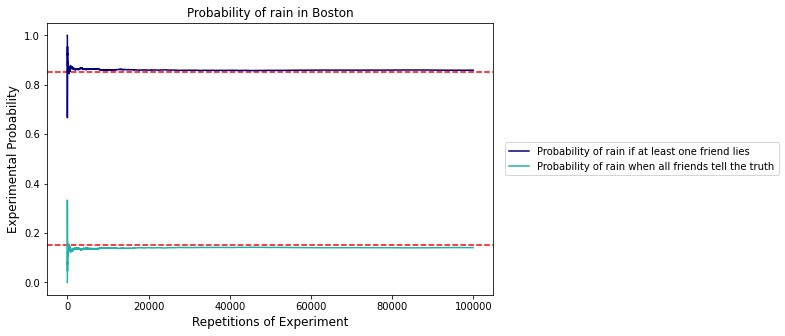

When the simulation is run 100000 times, the number of times that at least one friend said that it was not raining is 85903.
Our friends tell the truth 14.097000000000001 percent of the time.
The probability that it is raining in Boston when at least one friend lies is 85.90299999999999 percent.


In [ ]:
n = 100000

#empty lists for probability calculations
rain_lie_probability = []
rain_truth_probability = []

# counter variables for outcomes
# no. of times it did rain and at least one friend said no (at least 1 lying)
rain_lie = 0 
# no. of times it rained and all friends said no (all truth)
rain_truth = 0 

for i in range(n): 
    # generate random responses for 4 friends and determine if truth/lie
    responses_first_two_friends = [np.random.random() for _ in range(2)]
    responses_second_two_friends = [np.random.random() for _ in range(2)]
    lies_1 = sum([1 for i in responses_first_two_friends if i > 1/2])
    lies_2 = sum([1 for i in responses_second_two_friends if i > 3/4])
    lies = lies_1 + lies_2
    # increment counter
    if lies >= 1: 
      rain_lie += 1
    elif lies == 0: 
      rain_truth += 1
    # Calculate experimental probability for each iteration
    rain_lie_probability.append(rain_lie/(i+1))
    rain_truth_probability.append(rain_truth/(i+1))

#Graph experimental probabilty
plt.figure(figsize=(8,5))
plt.axhline(y=0.85, color='red', linestyle='--',lw=1.5)
plt.axhline(y=0.15, color='red', linestyle='--',lw=1.5)
plt.plot(rain_lie_probability,color='navy',label='Probability of rain if at least one friend lies')
plt.plot(rain_truth_probability,color='lightseagreen', label='Probability of rain when all friends tell the truth')
plt.tick_params(axis='x', colors='k')
plt.tick_params(axis='y', colors='k')
plt.title('Probability of rain in Boston')
plt.xlabel('Repetitions of Experiment',fontsize=12,color='k')
plt.ylabel('Experimental Probability',fontsize=12,color='k')
plt.legend(loc='center right',bbox_to_anchor=(1.65,0.5))
plt.show()

print('When the simulation is run '+ str(n) + ' times, the number of times that at least one friend said that it was not raining is ' + str(rain_lie) + 
      '.'+ '\n' +
      'Our friends tell the truth '+ str(100*(rain_truth/n)) + 
      ' percent of the time.' + '\n' + 'The probability that it is raining in Boston and at least one friend is lying ' + str(100*(rain_lie/(rain_lie + rain_truth))) + ' percent.')


# Simulation 2

Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

| Route | Length of Route (miles) |
|-----------------------|:---------:|
|New York - Atlanta | 866|
|New York - Nashville | 900 |
|Nashville - St. Louis |309 |
|Nashville - New Orleans |532 |
|Atlanta - St. Louis| 555|
|Atlanta - New Orleans | 470|
|St. Louis - Dallas | 662|
|New Orleans - Dallas | 505 |




Four total paths from NY-Dallas: 

|Paths| Total Distance (miles)|
|-----|:---------:|
|NY-ATL-STL-Dallas| 2083|
|NY-ATL-NOLA-Dallas| 1841|
|NY-NAS-STL-Dallas| 1871|
|NY-NAS-NOLA-Dallas|1937|

In [ ]:
n = 100000
start = [0,1] # where 0 = Atlanta and 1 = Nashville

# stores avg running total of distances
avg_distance_atl = [] # dist from atl
avg_distance_nas = [] # dist from nas

for i in range(n):
  distance_atl = [] # dist from atl
  distance_nas = [] # dist from nas
  starting_point = np.random.choice(start) #randomly selects Atlanta or Nashville as starting location

  if starting_point == 0: 
    distance_atl.append(866)
    distances = {'ATL-STL':555, 'ATL-NOLA':470}
    first_path = random.choice(list(distances.keys()))
    if first_path == 'ATL-STL': 
      distance_atl.append(distances.get('ATL-STL') + 662)
    else: 
      distance_atl.append(distances.get('ATL-NOLA') + 505)

    avg_distance_atl.append(sum(distance_atl))
  
  else: 
    distance_nas.append(900)
    distances = {'NAS-STL':309, 'NAS-NOLA':532}
    first_path = random.choice(list(distances.keys()))
    if first_path == 'NAS-STL': 
      distance_nas.append(distances.get('NAS-STL') + 662)
    else: 
      distance_nas.append(distances.get('NAS-NOLA') +505)
    
    avg_distance_nas.append(sum(distance_nas))

  
x = np.mean(avg_distance_atl)
y = np.mean(avg_distance_nas)

if x > y: 
  best_route = 'Nashville'
else: 
  best_route = 'Atlanta'

print('After ' + str(n) + ' simulations, the average distance for routes out of Atlanta is ' + str(x) +' miles, and the average distance for routes out of Nashville is ' + str(y) + ' miles.' + '\n' + 
      'Therefore, to reach Dallas from New York, Mad Max should start towards ' + best_route + '.')

After 100000 simulations, the average distance for routes out of Atlanta is 1961.7308362893043 miles, and the average distance for routes out of Nashville is 1903.8597033991337 miles.
Therefore, to reach Dallas from New York, Mad Max should start towards Nashville.


# Simulation 3

Simulate a population of 20000 individuals from a beta distribution that has the parametrization a=1.6 and b=2.1. Select 400 simple random samples of size 32 from this population and show that the sample means are normally distributed by using histograms, distributional plots, Quantile-Quantile plots and normality tests.

In [ ]:
# Generate population data from a beta distribution
X = stats.beta.rvs(size=20000,a=1.6,b=2.1)

# generate means of 400 random sample of size 32 from population
s = [np.mean(np.random.choice(X, size=32,p=None)) for _i in range(400)]
s1 = np.array(s)
# standardized averages
ss = SS()
s_standard = ss.fit_transform(s1.reshape(-1,1))


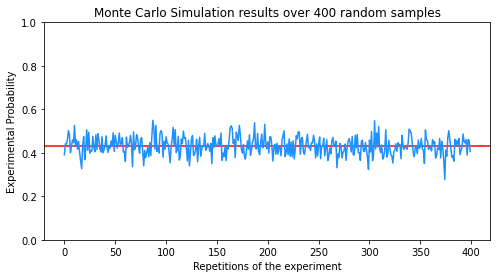

In [ ]:
plt.figure(figsize=(8,4))
plt.axhline(y=0.43, color = 'red') #where 0.3 represents mathematical probability of beta dist (a/(a+b)) 
plt.plot(s, color='dodgerblue')
plt.ylim([0,1])
plt.title('Monte Carlo Simulation results over 400 random samples')
plt.xlabel("Repetitions of the experiment",color='k')
plt.ylabel("Experimental Probability",color='k')
plt.show()

## Histogram

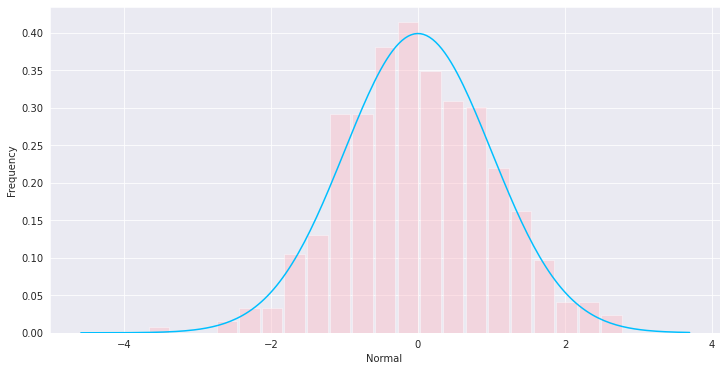

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.distplot(s_standard,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink', "rwidth": 0.9},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax.set( xlabel='Normal ', ylabel='Frequency')
sns.set_style("darkgrid")
ax.grid(fillstyle='full',c='white',zorder=1, which='major')
plt.show()

## Quantile-Quantile Plot 

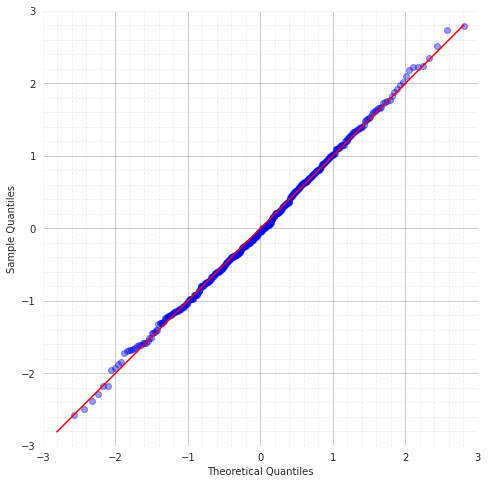

In [ ]:
N, M = 8,8
plt.rc("figure", figsize=(N,M))
plt.rcParams['axes.facecolor'] = 'white'
sm.qqplot((s-np.mean(s))/np.std(s), loc = 0, scale = 1, line='s',alpha=0.4)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

## Tests for normality

### Kolmogorov-Smirnoff test

In [ ]:
# With Scipy function
stats.kstest(s_standard.flatten(),'norm')

KstestResult(statistic=0.02918720306819156, pvalue=0.8749368223386413)

The Kolmogorov-Smirnoff test fails to reject the null hypothesis. Since the value of the test statistic is approximately 1, the standardized averages of beta-distributed sample data is normally distributed.

### Anderson-Darling test

In [ ]:
stats.anderson(s_standard.flatten(), dist='norm')

AndersonResult(statistic=0.20923789538255733, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Since the returned statistic is smaller than these critical values then for the corresponding significance level, the Anderson-Darling test fails to reject the null hypothesis.